# Тест и визуализация Word2Vec

## Импортируем необходимые библиотеки

In [6]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dataset

In [7]:
df = dataset.load_dataset()
df

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1387,1387,http://www.electroshops.com/,electroshops home theater decor interiors seat...,Business/Corporate
1388,1388,http://www.cleanridge.com/,clean ridge soap company clean ridge soap comp...,Business/Corporate
1389,1389,http://www.creativepetgifts.com/,home page pet crafts exquisitely piece handcut...,Business/Corporate
1390,1390,http://www.htmarket.com/,home theater marketplace home theater seating ...,Business/Corporate


## Применяем Word2Vec

In [12]:
sentences = [text.split() for text in df['cleaned_website_text']]  # Adjust based on your token format

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=5, min_count=1, workers=4)
model.save("word2vec.model")

def document_vector(model, doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv]
    if not doc:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

X = np.array([document_vector(model, doc) for doc in sentences])
y = df['Category'].values  # Your labels

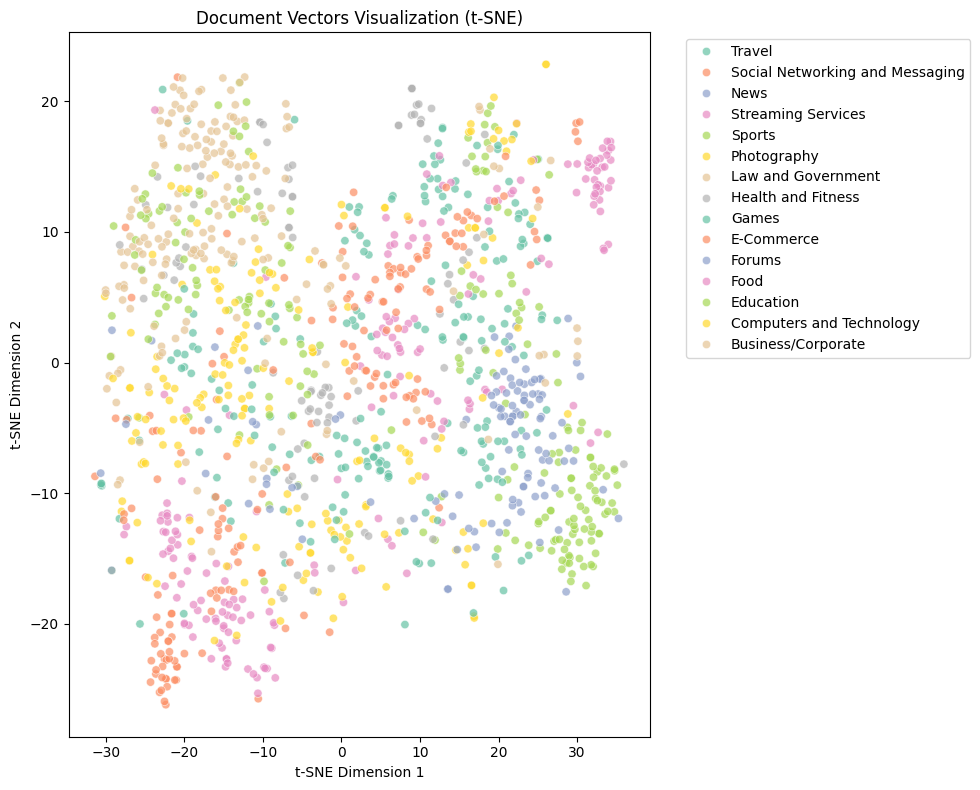

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
vectors_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=vectors_tsne[:, 0], y=vectors_tsne[:, 1], 
                hue=df['Category'], palette='Set2', alpha=0.7)
plt.title('Document Vectors Visualization (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()